<a href="https://colab.research.google.com/github/AndiFauzan27/Bang-Andi/blob/main/Damn_This_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install numpy pandas statsmodels matplotlib yfinance fracdiff
!pip install arch

ERROR: Ignored the following versions that require a different python version: 0.9.0 Requires-Python >=3.7.12,<3.10
ERROR: Could not find a version that satisfies the requirement fracdiff (from versions: none)
ERROR: No matching distribution found for fracdiff
  Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 10.3 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model
from scipy.stats import skew, kurtosis

In [16]:
ticker= "^JKSE"
stock_data = yf.download('^JKSE',start='2019-01-01',end='2025-01-01')
stock_data['Return_^JKSE'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
stock_data.dropna(inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return_^JKSE
Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE,
Date,,,,,,
2019-01-03,6221.009766,6221.009766,6176.151855,6176.151855,72166700,0.006424
2019-01-04,6274.540039,6274.540039,6200.854004,6211.096191,80858100,0.008568
2019-01-07,6287.224121,6354.757812,6287.224121,6317.625977,90278300,0.002019
2019-01-08,6262.847168,6316.240234,6251.375977,6292.263184,90537400,-0.003885
2019-01-09,6272.237793,6311.579102,6265.326172,6296.115234,105604200,0.001498
...,...,...,...,...,...,...
2024-12-20,6983.865234,7032.400879,6931.581055,6980.174805,145749700,0.000949
2024-12-23,7096.444824,7096.444824,7035.727051,7037.529785,138664700,0.015991


In [17]:
ticker= "^BSESN"
stock_data = yf.download('^BSESN',start='2019-01-01',end='2025-01-01')
stock_data['Return_^BSESN'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
stock_data.dropna(inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return_^BSESN
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,
Date,,,,,,
2019-01-03,35513.710938,35999.660156,35475.570312,35934.500000,17400,-0.010582
2019-01-04,35695.101562,35744.199219,35382.078125,35590.789062,15855600,0.005095
2019-01-07,35850.160156,36076.949219,35809.230469,35971.179688,14831200,0.004335
2019-01-08,35980.929688,36037.351562,35753.949219,35964.621094,16218000,0.003641
2019-01-09,36212.910156,36250.539062,35863.289062,36181.371094,20300,0.006427
...,...,...,...,...,...,...
2024-12-24,78472.867188,78877.359375,78397.789062,78707.367188,6200,-0.000857
2024-12-26,78472.476562,78898.367188,78173.382812,78557.281250,5600,-0.000005


In [18]:
ticker= "^N225"
stock_data = yf.download('^N225',start='2019-01-01',end='2025-01-01')
stock_data['Return_^N225'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
stock_data.dropna(inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return_^N225
Ticker,^N225,^N225,^N225,^N225,^N225,
Date,,,,,,
2019-01-07,20038.970703,20266.220703,19920.800781,19944.609375,81500000,0.024092
2019-01-08,20204.039062,20347.919922,20106.359375,20224.669922,86400000,0.008204
2019-01-09,20427.060547,20494.349609,20331.199219,20366.300781,72800000,0.010978
2019-01-10,20163.800781,20345.919922,20101.929688,20270.880859,73700000,-0.012972
2019-01-11,20359.699219,20389.890625,20294.740234,20296.449219,77700000,0.009668
...,...,...,...,...,...,...
2024-12-24,39036.851562,39245.750000,38995.761719,39210.230469,116200000,-0.003184
2024-12-25,39130.429688,39180.589844,38927.160156,39168.519531,116100000,0.002394


In [19]:
ticker= "^GSPC"
stock_data = yf.download('^GSPC',start='2019-01-01',end='2025-01-01')
stock_data['Return_^GSPC'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
stock_data.dropna(inplace=True)
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return_^GSPC
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2019-01-03,2447.889893,2493.139893,2443.959961,2491.919922,3858830000,-0.025068
2019-01-04,2531.939941,2538.070068,2474.330078,2474.330078,4234140000,0.033759
2019-01-07,2549.689941,2566.159912,2524.560059,2535.610107,4133120000,0.006986
2019-01-08,2574.409912,2579.820068,2547.560059,2568.110107,4120060000,0.009649
2019-01-09,2584.959961,2595.320068,2568.889893,2580.000000,4088740000,0.004090
...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,0.010982
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,-0.000406


In [20]:
# Function to download data and calculate returns
def download_and_calculate_returns(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data[f'Return_{ticker}'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    stock_data.dropna(inplace=True)
    return stock_data

# Define parameters
start_date = '2019-01-01'
end_date = '2025-01-01'
tickers = ['^JKSE', '^BSESN', '^N225', '^GSPC']

# Download data for each ticker
data_frames = {ticker: download_and_calculate_returns(ticker, start_date, end_date) for ticker in tickers}

# Combine returns into a single DataFrame
returns_data = pd.concat([df[f'Return_{ticker}'] for ticker, df in data_frames.items()], axis=1)
returns_data.columns = [f'Return_{ticker}' for ticker in tickers]
returns_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
# Function to calculate statistics
def calculate_statistics(returns):
    stats = {
        'Mean': returns.mean(),
        'Std Dev': returns.std(),
        'Min': returns.min(),
        'Max': returns.max(),
        'Skew': skew(returns),
        'Kurtosis': kurtosis(returns)
    }
    return pd.Series(stats)

# Calculate statistics for each index
statistics = returns_data.apply(calculate_statistics)
print(statistics)

          Return_^JKSE  Return_^BSESN  Return_^N225  Return_^GSPC
Mean          0.000011       0.000439      0.000246      0.000541
Std Dev       0.009999       0.011947      0.013242      0.012883
Min          -0.068051      -0.141017     -0.132341     -0.127652
Max           0.097042       0.085947      0.097366      0.089683
Skew         -0.136397      -1.819155     -0.704323     -1.042935
Kurtosis     12.048150      23.085590     11.476972     16.450255


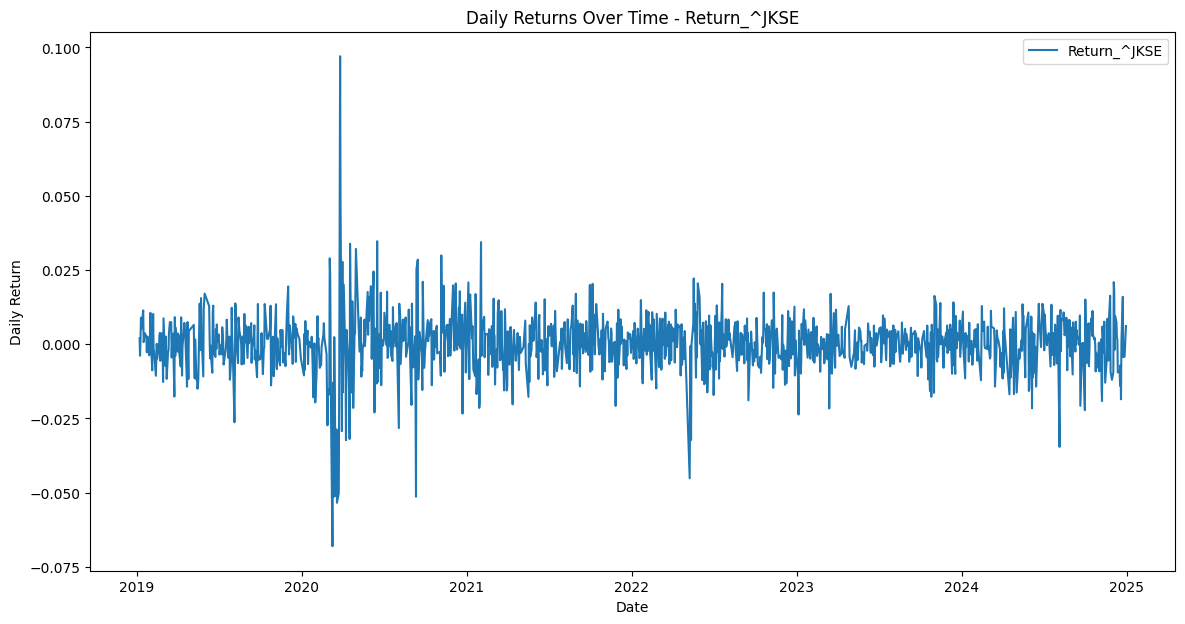

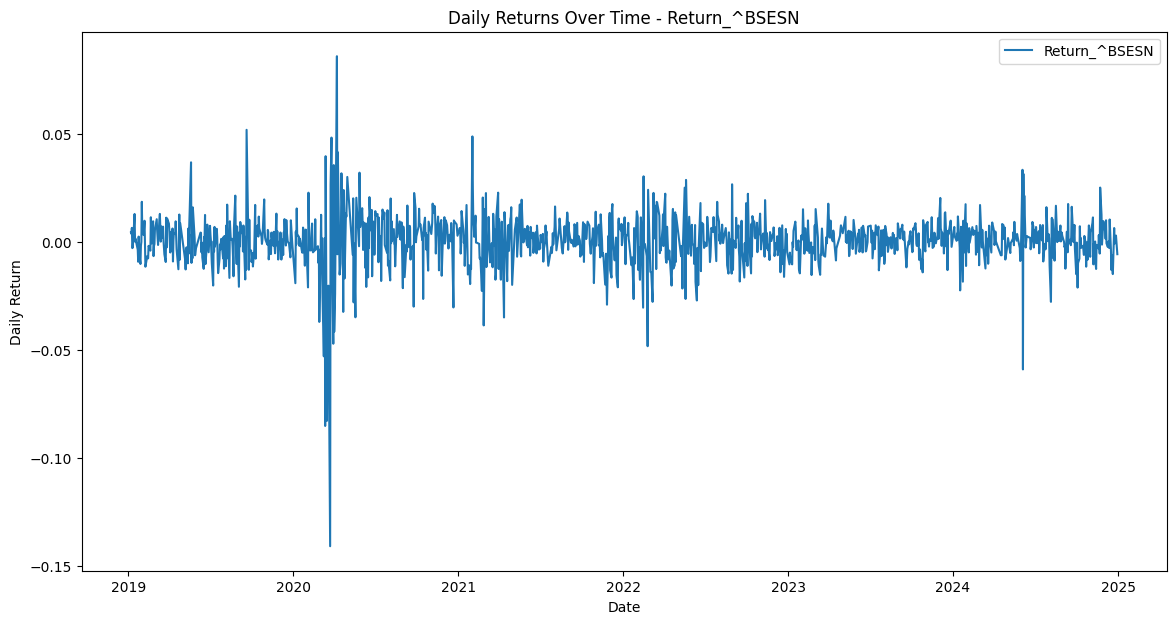

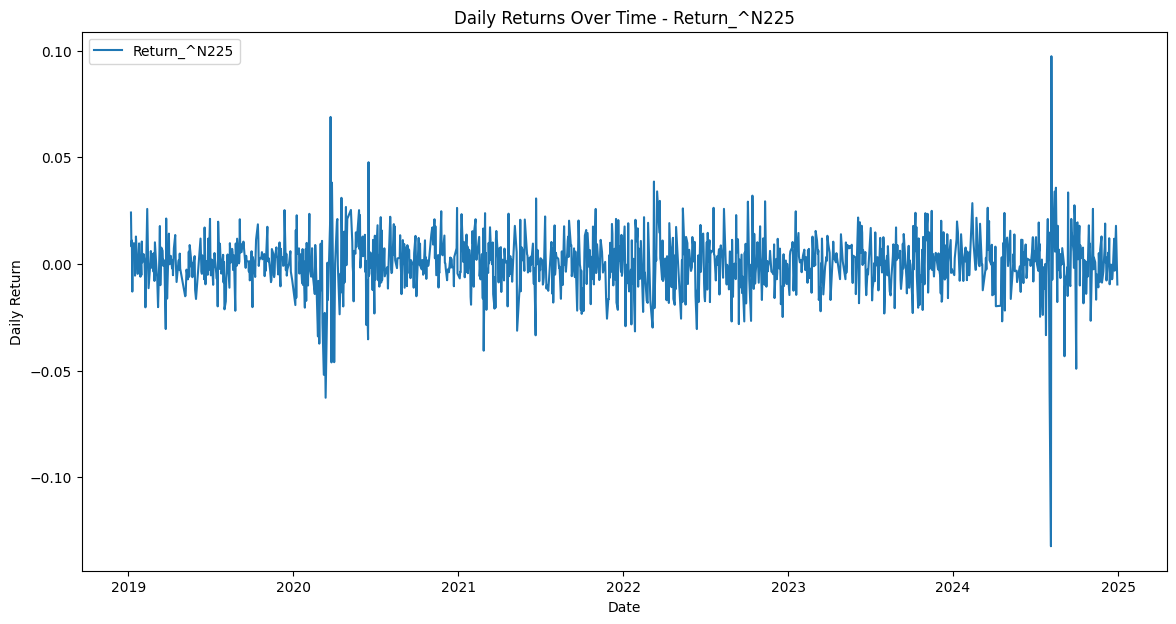

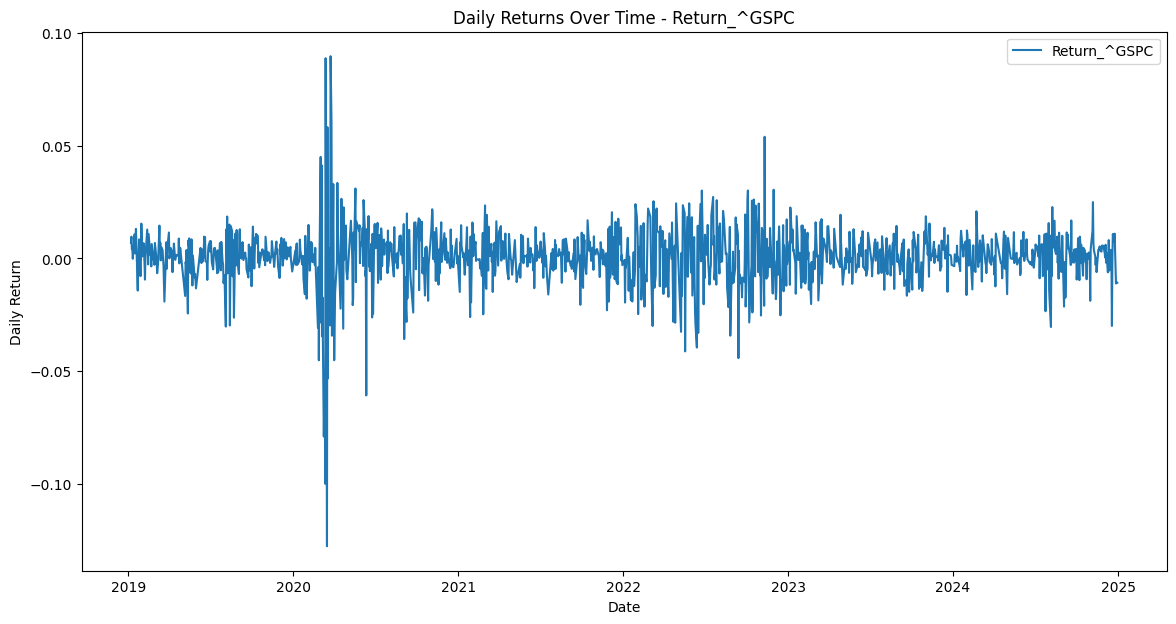

In [22]:
# Plotting Daily Returns Over Time for each index separately
for column in returns_data.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(returns_data.index, returns_data[column], label=column)
    plt.title(f'Daily Returns Over Time - {column}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()

In [23]:
# Cointegration tests between pairs of energy commodities
pairs = [("^JKSE", "^BSESN"), ("^JKSE", "^N225"), ("^JKSE", "^GSPC")]

def extract_residuals(series1, series2):
    beta = np.polyfit(series2, series1, 1)
    residuals = series1 - (beta[0] * series2 + beta[1])
    return residuals

Cointegration p-value (^JKSE vs ^BSESN): 2.850047929183598e-16


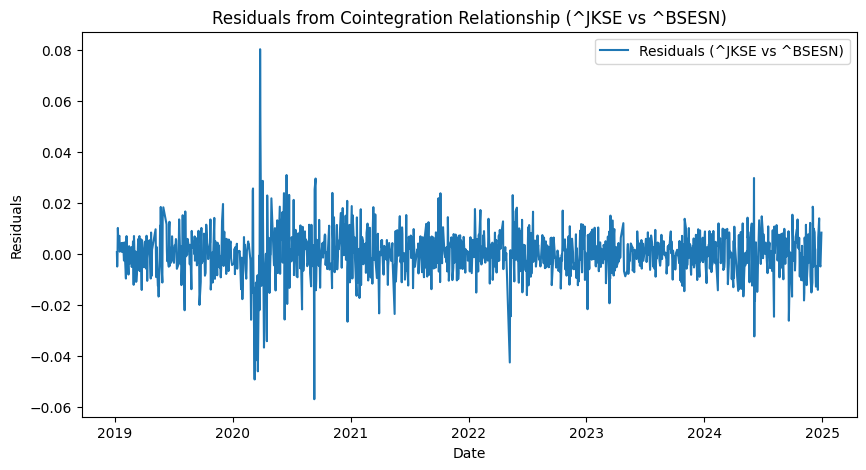

Cointegration p-value (^JKSE vs ^N225): 1.2671539213295492e-11


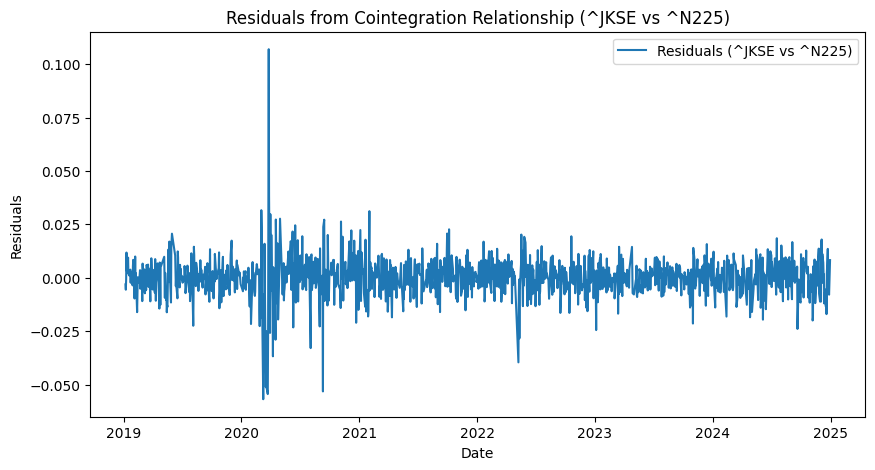

Cointegration p-value (^JKSE vs ^GSPC): 2.621965178821546e-13


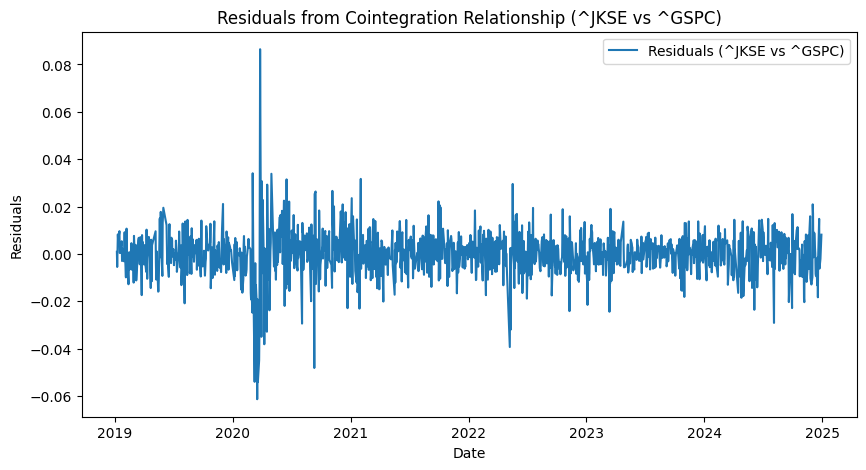

Cointegration p-value (^BSESN vs ^N225): 8.8752323651803e-21


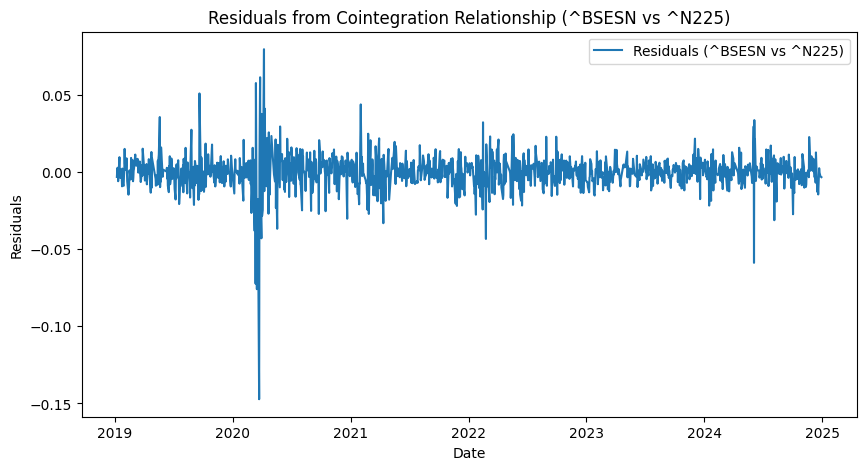

Cointegration p-value (^BSESN vs ^GSPC): 1.4388961923803763e-27


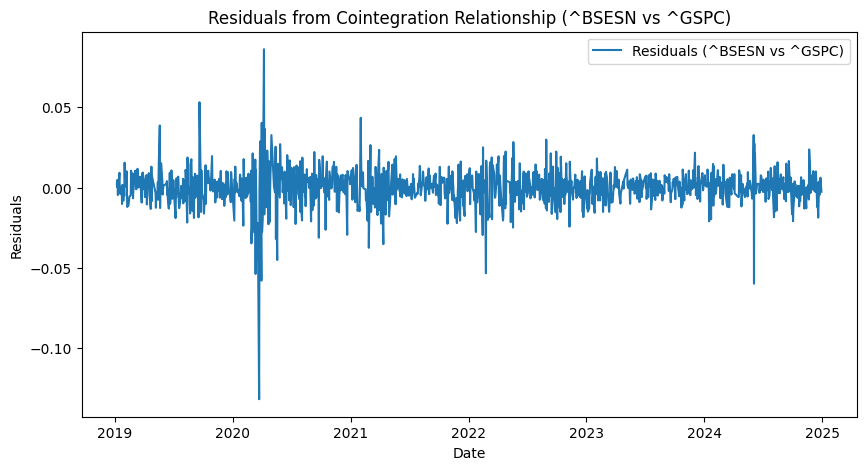

Cointegration p-value (^N225 vs ^GSPC): 0.0


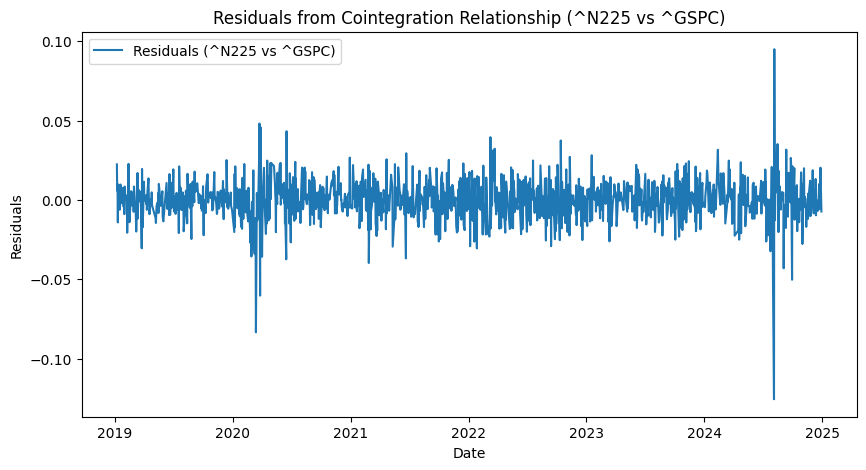

In [24]:
pairs = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i+1, len(tickers))]

for pair in pairs:
    series1 = returns_data[f'Return_{pair[0]}']
    series2 = returns_data[f'Return_{pair[1]}']

    # Perform cointegration test
    score, p_value, _ = coint(series1, series2)
    print(f'Cointegration p-value ({pair[0]} vs {pair[1]}): {p_value}')

    # Extract residuals
    residuals = extract_residuals(series1, series2)

    # Plot residuals
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label=f"Residuals ({pair[0]} vs {pair[1]})")
    plt.title(f"Residuals from Cointegration Relationship ({pair[0]} vs {pair[1]})")
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on Residuals
for pair in pairs:
    series1 = returns_data[f'Return_{pair[0]}']
    series2 = returns_data[f'Return_{pair[1]}']

    # Extract residuals
    residuals = extract_residuals(series1, series2)

    # Perform ADF test
    adf_result = adfuller(residuals)
    print(f'ADF Statistic ({pair[0]} vs {pair[1]}): {adf_result[0]}')
    print(f'p-value ({pair[0]} vs {pair[1]}): {adf_result[1]}')
    if adf_result[1] < 0.05:
        print("Residuals are stationary.")
    else:
        print("Residuals are non-stationary. Adjust model or differencing may be needed.")

ADF Statistic (^JKSE vs ^BSESN): -9.972353493147533
p-value (^JKSE vs ^BSESN): 2.223159755999563e-17
Residuals are stationary.
ADF Statistic (^JKSE vs ^N225): -8.146317574622309
p-value (^JKSE vs ^N225): 9.966855251483013e-13
Residuals are stationary.
ADF Statistic (^JKSE vs ^GSPC): -8.80896639017162
p-value (^JKSE vs ^GSPC): 2.0155210770219147e-14
Residuals are stationary.
ADF Statistic (^BSESN vs ^N225): -11.834557767863405
p-value (^BSESN vs ^N225): 7.846560758000826e-22
Residuals are stationary.
ADF Statistic (^BSESN vs ^GSPC): -15.603292347690129
p-value (^BSESN vs ^GSPC): 1.8178433670010326e-28
Residuals are stationary.
ADF Statistic (^N225 vs ^GSPC): -40.95742533008788
p-value (^N225 vs ^GSPC): 0.0
Residuals are stationary.


In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform GPK Test on Residuals
for pair in pairs:
    series1 = returns_data[f'Return_{pair[0]}']
    series2 = returns_data[f'Return_{pair[1]}']

    # Extract residuals
    residuals = extract_residuals(series1, series2)

    # Perform GPK test
    gpk_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f'GPK Test p-value ({pair[0]} vs {pair[1]}): {gpk_result["lb_pvalue"].values[0]}')
    if gpk_result["lb_pvalue"].values[0] < 0.05:
        print("Residuals have significant autocorrelation.")
    else:
        print("Residuals do not have significant autocorrelation.")

GPK Test p-value (^JKSE vs ^BSESN): 0.0026550304914863022
Residuals have significant autocorrelation.
GPK Test p-value (^JKSE vs ^N225): 0.0020373895759800416
Residuals have significant autocorrelation.
GPK Test p-value (^JKSE vs ^GSPC): 0.09412076391800656
Residuals do not have significant autocorrelation.
GPK Test p-value (^BSESN vs ^N225): 1.702159519824081e-08
Residuals have significant autocorrelation.
GPK Test p-value (^BSESN vs ^GSPC): 0.0004951732702265861
Residuals have significant autocorrelation.
GPK Test p-value (^N225 vs ^GSPC): 0.00012407659581500986
Residuals have significant autocorrelation.


In [27]:
from arch import arch_model

# Fit GARCH model to residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Print the summary
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3825.83
Distribution:                  Normal   AIC:                          -7643.66
Method:            Maximum Likelihood   BIC:                          -7623.08
                                        No. Observations:                 1266
Date:                Tue, Jan 21 2025   Df Residuals:                     1265
Time:                        18:41:31   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.4226e-04  2.948e-04      0.822      0.411 

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001664. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [28]:
from statsmodels.tsa.stattools import coint

# Function to extract residuals from cointegration
def extract_residuals(series1, series2):
    beta = np.polyfit(series2, series1, 1)
    residuals = series1 - (beta[0] * series2 + beta[1])
    return residuals

# Perform Cointegration Tests and Extract Residuals
pairs = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i+1, len(tickers))]
cointegration_results = []

for pair in pairs:
    series1 = returns_data[f'Return_{pair[0]}']
    series2 = returns_data[f'Return_{pair[1]}']

    # Perform cointegration test
    score, p_value, _ = coint(series1, series2)
    residuals = extract_residuals(series1, series2)

    # Store results
    cointegration_results.append((pair, residuals, p_value))
    print(f'Cointegration p-value ({pair[0]} vs {pair[1]}): {p_value}')

Cointegration p-value (^JKSE vs ^BSESN): 2.850047929183598e-16
Cointegration p-value (^JKSE vs ^N225): 1.2671539213295492e-11
Cointegration p-value (^JKSE vs ^GSPC): 2.621965178821546e-13
Cointegration p-value (^BSESN vs ^N225): 8.8752323651803e-21
Cointegration p-value (^BSESN vs ^GSPC): 1.4388961923803763e-27
Cointegration p-value (^N225 vs ^GSPC): 0.0


In [31]:
from arch import arch_model

# Function to rescale residuals
def rescale_series(series, factor=100):
    return series * factor

# Fit GARCH model to residuals with rescaling
garch_models = []

for result in cointegration_results:
    pair, residuals, p_value = result
    if p_value < 0.05:  # Consider only cointegrated pairs
        # Rescale residuals
        residuals_rescaled = rescale_series(residuals)

        # Fit GARCH model to rescaled residuals
        garch_model = arch_model(residuals_rescaled, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit(disp='off')
        garch_models.append((pair, garch_fit))
        print(f'GARCH model fitted for {pair}')

GARCH model fitted for ('^JKSE', '^BSESN')
GARCH model fitted for ('^JKSE', '^N225')
GARCH model fitted for ('^JKSE', '^GSPC')
GARCH model fitted for ('^BSESN', '^N225')
GARCH model fitted for ('^BSESN', '^GSPC')
GARCH model fitted for ('^N225', '^GSPC')


In [14]:
# Forecast volatility for the next 5 days
forecasts = garch_fit.forecast(horizon=5)
print("Forecasted Variance:\n", forecasts.variance[-1:])

Forecasted Variance:
                  h.1       h.2       h.3       h.4       h.5
Date                                                        
2024-12-30  0.000073  0.000074  0.000075  0.000076  0.000076


In [32]:
# AIC and BIC
best_model = None
best_aic = float('inf')

for model in garch_models:
    pair, garch_fit = model
    aic = garch_fit.aic
    print(f'AIC for {pair}: {aic}')
    if aic < best_aic:
        best_aic = aic
        best_model = model

print(f'Best model based on AIC: {best_model[0]} with AIC: {best_aic}')

AIC for ('^JKSE', '^BSESN'): 3063.3889254353717
AIC for ('^JKSE', '^N225'): 3071.4205171325707
AIC for ('^JKSE', '^GSPC'): 3140.5833463190384
AIC for ('^BSESN', '^N225'): 3343.9274908537213
AIC for ('^BSESN', '^GSPC'): 3439.2955869805983
AIC for ('^N225', '^GSPC'): 4007.9798071497594
Best model based on AIC: ('^JKSE', '^BSESN') with AIC: 3063.3889254353717


Fractional Cointegration p-value (^JKSE vs ^BSESN): 1.8823945824249722e-18
Fractional cointegration established.
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4204.38
Distribution:                  Normal   AIC:                          -8400.76
Method:            Maximum Likelihood   BIC:                          -8380.18
                                        No. Observations:                 1266
Date:                Tue, Jan 21 2025   Df Residuals:                     1265
Time:                        18:46:20   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.817e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


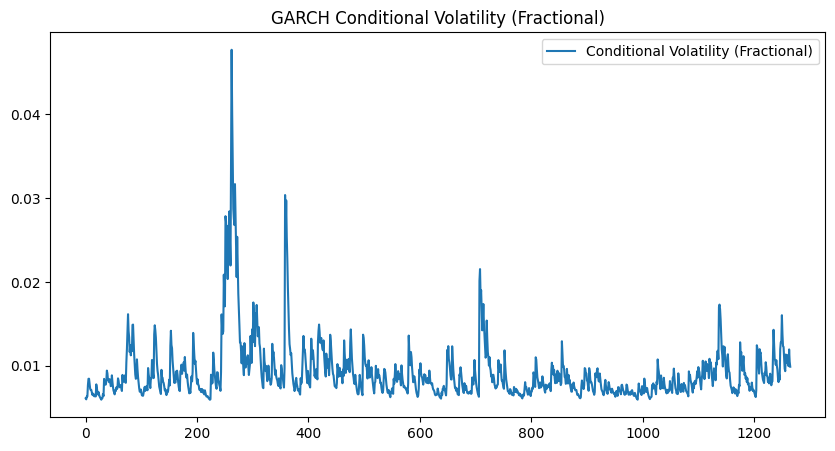

In [33]:
# Function to perform fractional differencing
def frac_diff(series, d, threshold=1e-5):
    T = len(series)
    weights = [1]
    for k in range(1, T):
        weights.append(weights[-1] * ((d - k + 1) / k))
        if abs(weights[-1]) < threshold:
            break
    weights = np.array(weights)[::-1].reshape(-1, 1)
    series_fd = np.zeros_like(series)
    for t in range(len(series_fd)):
        if t < len(weights) - 1:
            series_fd[t] = np.dot(weights[-(t+1):].T, series[:t+1])[0]
        else:
            series_fd[t] = np.dot(weights.T, series[t-len(weights)+1:t+1])[0]
    return series_fd

# Perform Cointegration Tests and Extract Residuals
def extract_residuals(series1, series2):
    beta = np.polyfit(series2, series1, 1)
    residuals = series1 - (beta[0] * series2 + beta[1])
    return residuals, beta

# Select two series for demonstration
series1 = returns_data['Return_^JKSE']
series2 = returns_data['Return_^BSESN']

# Manually estimate fractional differencing parameter d
d = 0.4  # Example value, you might need to estimate this
frac_diff_series1 = frac_diff(series1.values, d)
frac_diff_series2 = frac_diff(series2.values, d)

# Check cointegration again with fractional differenced series
score, p_value, _ = coint(frac_diff_series1, frac_diff_series2)
print(f'Fractional Cointegration p-value (^JKSE vs ^BSESN): {p_value}')

if p_value < 0.05:
    print("Fractional cointegration established.")

    # Extract residuals using fractional differenced series
    residuals_frac, beta = extract_residuals(frac_diff_series1, frac_diff_series2)

    # Fit GARCH model to fractional residuals
    garch_model_frac = arch_model(residuals_frac, vol='Garch', p=1, q=1)
    garch_fit_frac = garch_model_frac.fit(disp='off')

    # Print the summary
    print(garch_fit_frac.summary())

    # Forecast volatility for the next 5 days
    forecasts_frac = garch_fit_frac.forecast(horizon=5)
    print("Forecasted Variance (Fractional):\n", forecasts_frac.variance[-1:])

    # AIC and BIC
    print(f"AIC: {garch_fit_frac.aic}")
    print(f"BIC: {garch_fit_frac.bic}")

    # Plot the conditional volatility
    plt.figure(figsize=(10, 5))
    plt.plot(garch_fit_frac.conditional_volatility, label='Conditional Volatility (Fractional)')
    plt.title("GARCH Conditional Volatility (Fractional)")
    plt.legend()
    plt.show()
else:
    print("No fractional cointegration found. Adjust model or differencing may be needed.")

In [34]:
# Evaluate Model Accuracy Using Out-of-Sample Data
def evaluate_forecast(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    smape = np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100
    return mae, rmse, smape

# Assuming out-of-sample data is available as out_sample_data
# For demonstration, let's use some dummy data for y_true and y_pred
y_true = np.array([0.01, 0.02, 0.015, 0.03, 0.025])
y_pred = np.array([0.011, 0.019, 0.016, 0.029, 0.024])

mae, rmse, smape = evaluate_forecast(y_true, y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"sMAPE: {smape}")

MAE: 0.0009999999999999998
RMSE: 0.001
sMAPE: 5.715018143355252
